In [3]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [4]:
df = pandas.read_csv('binom_short_variant_call_metrics.csv')

In [5]:
df

,VCF name,Binomial_probability,TP,FP,FN,Precision,Recall,F-Score
0,variant_call_short_results/binom_p0.5_short_va...,0.50,97278,2428,2605,0.975648,0.973919,0.974783
1,variant_call_short_results/binom_p0.6_short_va...,0.60,99561,145,322,0.998546,0.996776,0.997660
2,variant_call_short_results/binom_p0.65_short_v...,0.65,99561,145,322,0.998546,0.996776,0.997660
3,variant_call_short_results/binom_p0.7_short_va...,0.70,99563,145,320,0.998546,0.996796,0.997670
4,variant_call_short_results/binom_p0.75_short_v...,0.75,99559,151,324,0.998486,0.996756,0.997620
5,variant_call_short_results/binom_p0.8_short_va...,0.80,99570,144,313,0.998556,0.996866,0.997710
6,variant_call_short_results/binom_p0.85_short_v...,0.85,99599,115,284,0.998847,0.997157,0.998001
7,variant_call_short_results/binom_p0.9_short_va...,0.90,99566,153,317,0.998466,0.996826,0.997645
8,variant_call_short_results/binom_p0.95_short_v...,0.95,99407,321,476,0.996781,0.995234,0.996007
9,variant_call_short_results/binom_p0.98_short_v...,0.98,98888,859,995,0.991388,0.990038,0.990713


------------------------------------------------------------
------------------------------------------------------------

Results for best precision, recall and F-score values:

------------------------------------------------------------
------------------------------------------------------------


In [6]:
#Find results for best Precision

df[df['Precision'] == df['Precision'].max()]

,VCF name,Binomial_probability,TP,FP,FN,Precision,Recall,F-Score
6,variant_call_short_results/binom_p0.85_short_v...,0.85,99599,115,284,0.998847,0.997157,0.998001


In [7]:
#Find results for best Recall

df[df['Recall'] == df['Recall'].max()]

,VCF name,Binomial_probability,TP,FP,FN,Precision,Recall,F-Score
6,variant_call_short_results/binom_p0.85_short_v...,0.85,99599,115,284,0.998847,0.997157,0.998001


In [8]:
#Find results for best F-Score

df[df['F-Score'] == df['F-Score'].max()]

,VCF name,Binomial_probability,TP,FP,FN,Precision,Recall,F-Score
6,variant_call_short_results/binom_p0.85_short_v...,0.85,99599,115,284,0.998847,0.997157,0.998001


------------------------------------------------------------
------------------------------------------------------------

Ploted results for different values of binomial probability.
For probability greater than 0.6, stay stable and reach the peak at 0.85, and then deteriorate again.

------------------------------------------------------------
------------------------------------------------------------

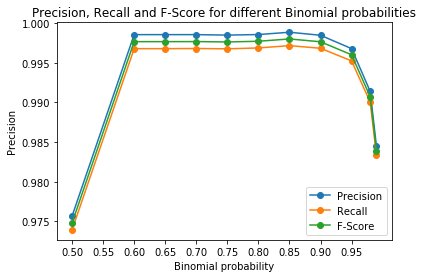

In [9]:
# Plot Precision, Recall and F-score for different binomial probabilities

df_pr = df['Precision']
df_re = df['Recall']
df_fs = df['F-Score']
df_bin = df['Binomial_probability']
plt.plot(df_bin,df_pr,marker="o")
plt.plot(df_bin,df_re,marker="o")
plt.plot(df_bin,df_fs,marker="o")
plt.xlabel('Binomial probability')
plt.ylabel("Precision")
plt.xticks(numpy.arange(0.5, 1.0, step=0.05))
plt.title("Precision, Recall and F-Score for different Binomial probabilities")
plt.legend()
plt.show()

------------------------------------------------------------
------------------------------------------------------------

Ploted TP, FP and FN values for different values of binomial probability.
For probability greater than 0.6, results for TP improve and stay stable until probility reaches 0.85, and then deteriorate again.

FP and FN values have the opposite behavior. Although they stay many times smaller than TP, their values rise for probability less than 0.6 and greater than 0.8

------------------------------------------------------------
------------------------------------------------------------

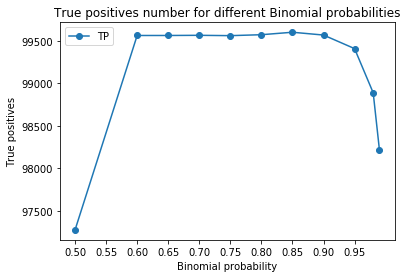

In [10]:
df_tp = df['TP']
df_bin = df['Binomial_probability']
plt.plot(df_bin,df_tp,marker="o")
plt.xlabel('Binomial probability')
plt.ylabel("True positives")
plt.xticks(numpy.arange(0.5, 1.0, step=0.05))
plt.title("True positives number for different Binomial probabilities")
plt.legend()
plt.show()

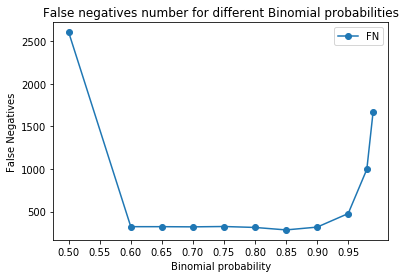

In [11]:
df_fn = df['FN']
df_bin = df['Binomial_probability']
plt.plot(df_bin,df_fn,marker="o")
plt.xlabel('Binomial probability')
plt.ylabel("False Negatives")
plt.xticks(numpy.arange(0.5, 1.0, step=0.05))
plt.title("False negatives number for different Binomial probabilities")
plt.legend()
plt.show()

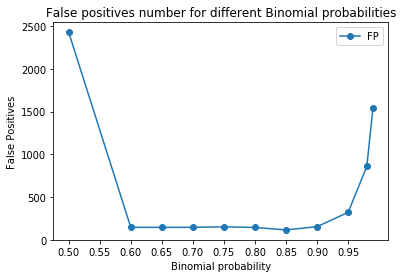

In [12]:
df_fp = df['FP']
df_bin = df['Binomial_probability']
plt.plot(df_bin,df_fp,marker="o")
plt.xlabel('Binomial probability')
plt.ylabel("False Positives")
plt.xticks(numpy.arange(0.5, 1.0, step=0.05))
plt.title("False positives number for different Binomial probabilities")
plt.legend()
plt.show()

------------------------------------------------------------
------------------------------------------------------------

Pie charts for TP, FP and FN values for 0.5, 0.85 and 0.98 binomial probability.

------------------------------------------------------------
------------------------------------------------------------

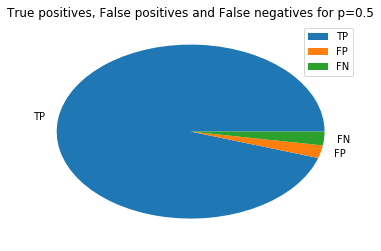

In [14]:
lab = ["TP", "FP", "FN"]
y = numpy.array([
    df['TP'][df['Binomial_probability'] == 0.5].values[0],
    df['FP'][df['Binomial_probability']==0.5].values[0],
    df['FN'][df['Binomial_probability']==0.5].values[0]
            ])
plt.title("True positives, False positives and False negatives for p=0.5")
plt.pie(y, labels = lab)
plt.legend()
plt.show()

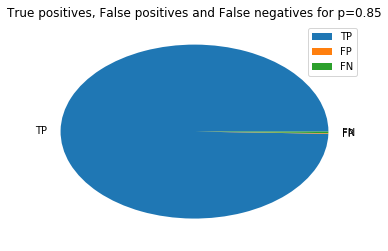

In [15]:
lab = ["TP", "FP", "FN"]
y = numpy.array([
    df['TP'][df['Binomial_probability'] == 0.85].values[0],
    df['FP'][df['Binomial_probability']==0.85].values[0],
    df['FN'][df['Binomial_probability']==0.85].values[0]
            ])
plt.title("True positives, False positives and False negatives for p=0.85")
plt.pie(y, labels = lab)
plt.legend()
plt.show()

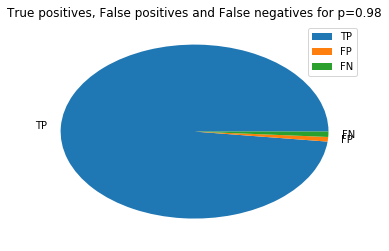

In [16]:
lab = ["TP", "FP", "FN"]
y = numpy.array([
    df['TP'][df['Binomial_probability'] == 0.98].values[0],
    df['FP'][df['Binomial_probability']==0.98].values[0],
    df['FN'][df['Binomial_probability']==0.98].values[0]
            ])
plt.title("True positives, False positives and False negatives for p=0.98")
plt.pie(y, labels = lab)
plt.legend()
plt.show()